## Insurance Charge Price Prediction

### Problem Statement:
The objective of the insurance dataset is to predict charges. The datasets of several predictor (independent) variables and one target variable (charges)

### Dataset Information:
1) Age: Age of Primary Beneficiary   
2) Sex: Insurance Contractor gender (female, male)    
3) BMI: Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9      
 4) Children: Number of children covered by health insurance / Number of dependents      
5) Smoker: Smoking         
6) Region: The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.        
7) charges: Individual medical costs billed by health insurance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,female,27.900,0,yes,southwest,16884.92400
1,1002,18,male,33.770,1,no,southeast,1725.55230
2,1003,28,male,33.000,3,no,southeast,4449.46200
3,1004,33,male,22.705,0,no,northwest,21984.47061
4,1005,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,id,age,sex,bmi,children,smoker,region,charges
1333,2334,50,male,30.97,3,no,northwest,10600.5483
1334,2335,18,female,31.92,0,no,northeast,2205.9808
1335,2336,18,female,36.85,0,no,southeast,1629.8335
1336,2337,21,female,25.80,0,no,southwest,2007.9450
1337,2338,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
df.describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1001.000000,18.000000,15.960000,0.000000,1121.873900
25%,1335.250000,27.000000,26.296250,0.000000,4740.287150
50%,1669.500000,39.000000,30.400000,1.000000,9382.033000
75%,2003.750000,51.000000,34.693750,2.000000,16639.912515
max,2338.000000,64.000000,53.130000,5.000000,63770.428010


###  NUM_FEATURES

In [8]:
df.dtypes[df.dtypes!='object'].index

Index(['id', 'age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
num_features=df.dtypes[df.dtypes!='object'].index

In [10]:
len(num_features)

5

In [11]:
df[num_features].describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1001.000000,18.000000,15.960000,0.000000,1121.873900
25%,1335.250000,27.000000,26.296250,0.000000,4740.287150
50%,1669.500000,39.000000,30.400000,1.000000,9382.033000
75%,2003.750000,51.000000,34.693750,2.000000,16639.912515
max,2338.000000,64.000000,53.130000,5.000000,63770.428010


### Categorical_Features

In [12]:
cat_features=df.dtypes[df.dtypes=='object'].index

In [13]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
len(cat_features)

3

In [15]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Unique in categorical Variables

### Sex Column

In [16]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [17]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Smoker Column

In [18]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [19]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### Region Column

In [20]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Drop the Duplicates

In [22]:


df.shape

(1338, 8)

In [23]:
df.duplicated().sum()

0

In [24]:
df=df.drop_duplicates()

In [25]:
df.shape  ### if there are any duplicate values here shape of the data will be varies.

(1338, 8)

### Checking Null values

In [26]:
df.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:

## in case if there are any null values we can through the below example.
## 1) we have to replace with mean , median or mode.
## like example, df['credit score'].mean().

## df['Credit Score'].fillna(df['Credit Score'].median(),inplace= True)


## 2) otherwise if there are any some null values like 1 or 2 we drop it by using function :-
   ## df.dropna(axis=0,inplace=True)

### Data Visualization

### Sex Column

<AxesSubplot:>

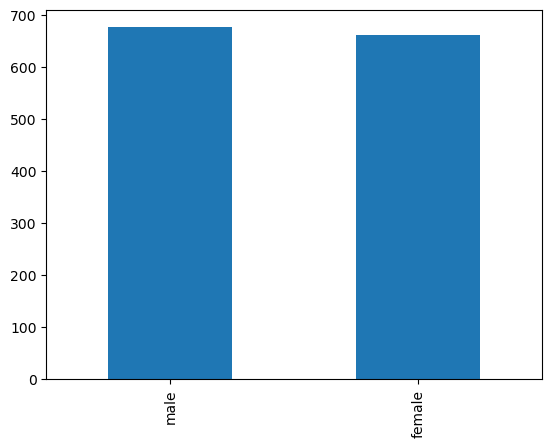

In [28]:
df['sex'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sex', ylabel='charges'>

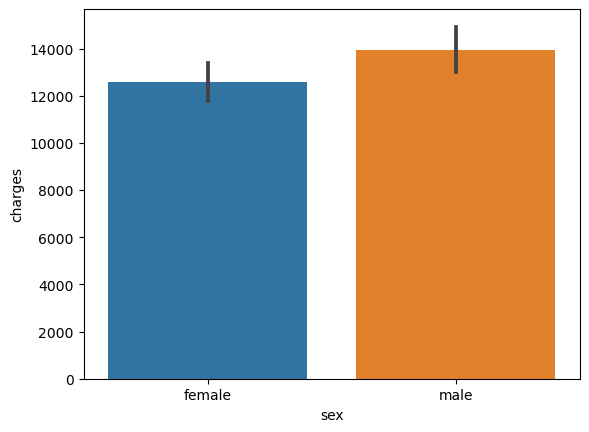

In [29]:
sns.barplot(x='sex',y='charges',data=df)

### Smoker Column

<AxesSubplot:>

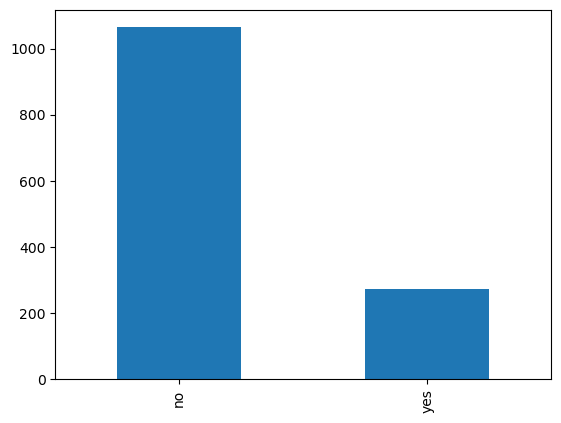

In [30]:
df['smoker'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

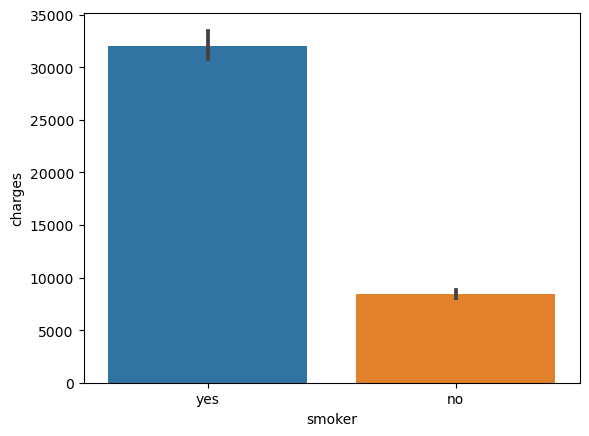

In [31]:
sns.barplot(x='smoker',y='charges',data=df)

#### Region Column

<AxesSubplot:>

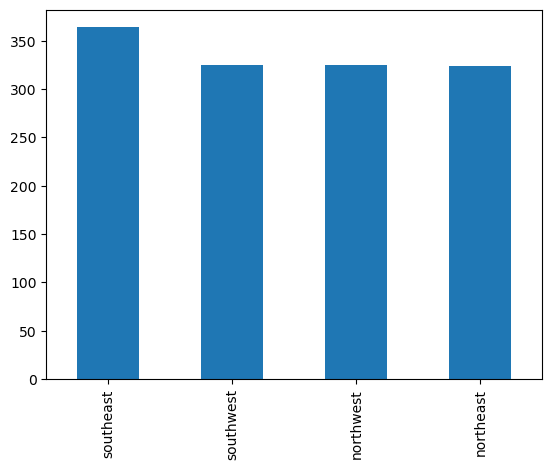

In [32]:
df['region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='region', ylabel='charges'>

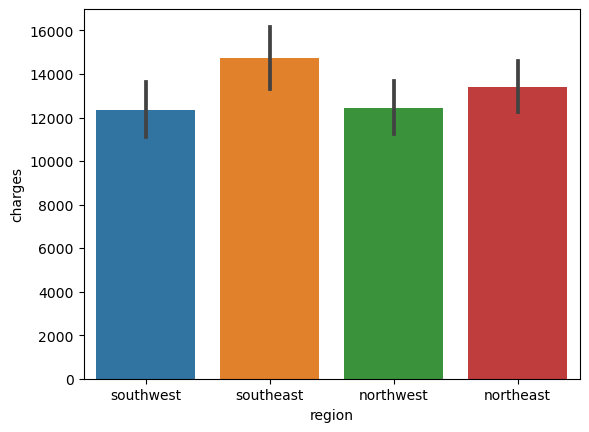

In [33]:
sns.barplot(x='region',y='charges',data=df)

In [34]:
df.corr()['charges']

id         -0.003373
age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

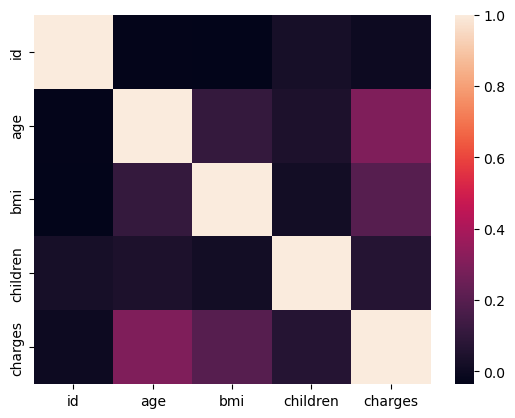

In [35]:
sns.heatmap(df.corr())


####  Histograms

Histograms are one of the most common graphs used to display numeric data.   
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>]],
      dtype=object)

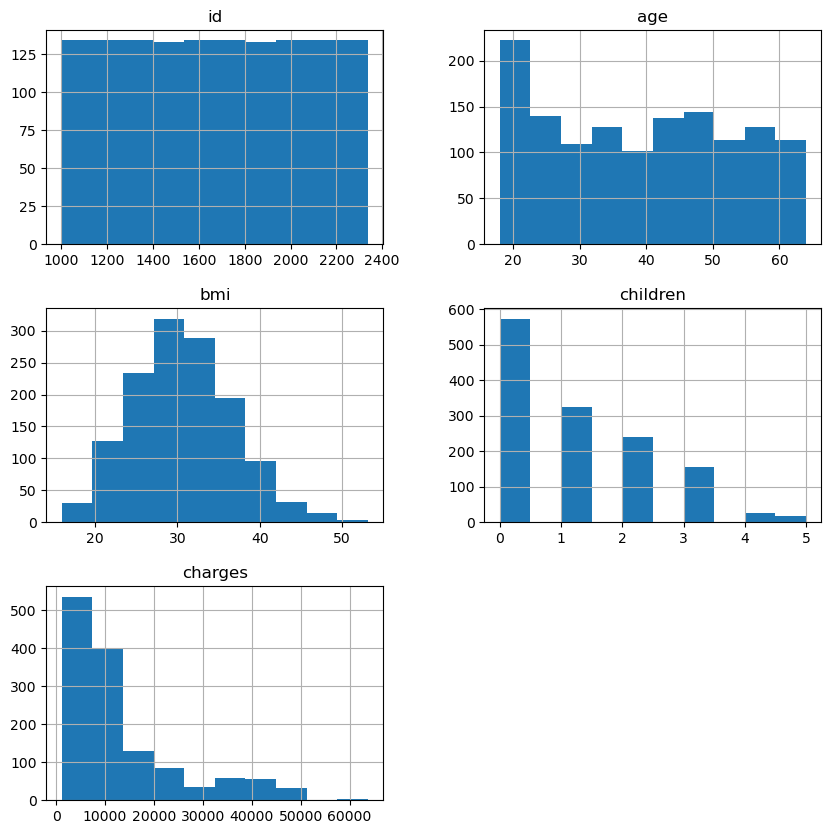

In [36]:
df.hist(bins=10,figsize=(10,10))

<AxesSubplot:xlabel='charges', ylabel='Density'>

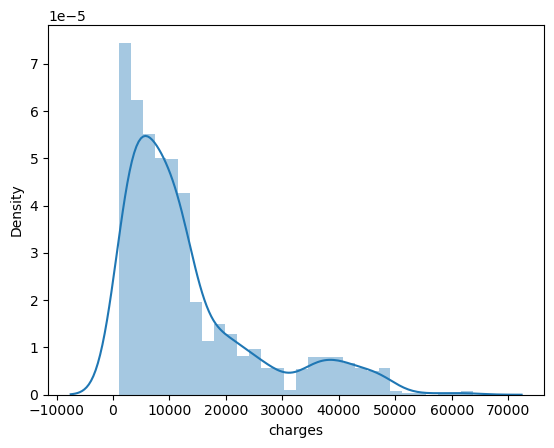

In [37]:
sns.distplot(df['charges'])

###### BY the above plot we can observe there is an right skewd distrubtion so we can use, Log transfromation Technique.

<AxesSubplot:xlabel='charges', ylabel='Density'>

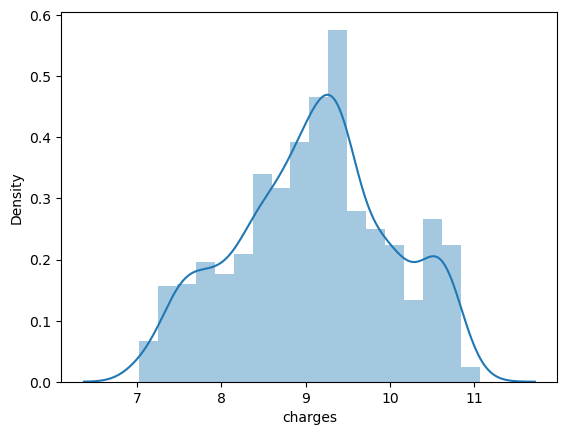

In [38]:
sns.distplot(np.log(df['charges']))

Now we can observe that is normal distrubtion  by using log transformation. 

In [39]:
df1=df.copy(deep=True)

In [40]:
df1['charges']=np.log(df['charges'])

In [41]:
df1.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,female,27.900,0,yes,southwest,9.734176
1,1002,18,male,33.770,1,no,southeast,7.453302
2,1003,28,male,33.000,3,no,southeast,8.400538
3,1004,33,male,22.705,0,no,northwest,9.998092
4,1005,32,male,28.880,0,no,northwest,8.260197


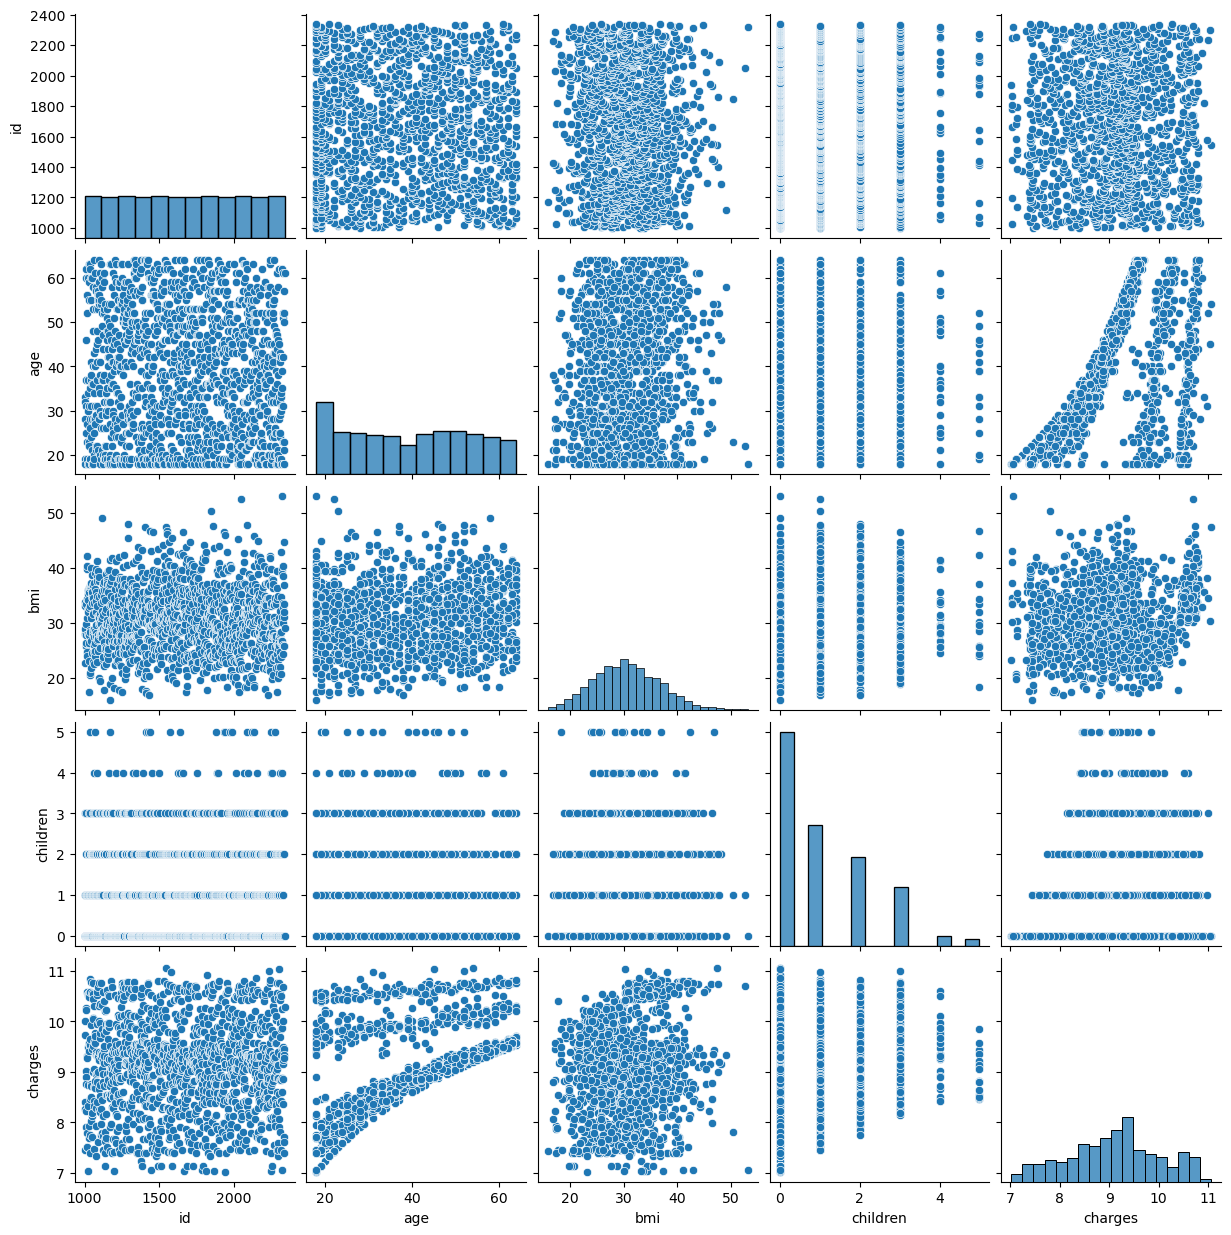

In [42]:
sns.pairplot(df1)
plt.show()

### Featuring Engineering

In [43]:
df1=pd.get_dummies(df1,drop_first=True)

In [44]:
df1.head()

,id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1001,19,27.900,0,9.734176,0,1,0,0,1
1,1002,18,33.770,1,7.453302,1,0,0,1,0
2,1003,28,33.000,3,8.400538,1,0,0,1,0
3,1004,33,22.705,0,9.998092,1,0,1,0,0
4,1005,32,28.880,0,8.260197,1,0,1,0,0


In [45]:
df1.drop('id',axis=1,inplace=True)

In [46]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0


In [47]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0


### split dataframe into x and y

In [48]:
x=df1.drop('charges',axis=1)

In [49]:
y=df1['charges']

In [50]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [51]:
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

In [54]:
x.shape,y.shape

((1338, 8), (1338,))

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [67]:

x_train.shape,x_test.shape

((1070, 8), (268, 8))

In [68]:
y_train.shape, y_test.shape

((1070,), (268,))

### Feature Scaling 

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()

In [60]:
x_train=sc.fit_transform(x_train)

In [62]:
x_train

array([[ 1.00228629, -0.66474472, -0.90705771, ...,  1.76954066,
        -0.59822071, -0.57519194],
       [ 1.00228629, -1.51402369, -0.07894188, ..., -0.56511841,
        -0.59822071,  1.73855008],
       [-1.50426607,  1.08117685, -0.90705771, ..., -0.56511841,
         1.67162383, -0.57519194],
       ...,
       [ 0.85905473,  0.70063454,  0.74917395, ..., -0.56511841,
        -0.59822071, -0.57519194],
       [ 0.07128113, -1.38009893,  0.74917395, ..., -0.56511841,
         1.67162383, -0.57519194],
       [ 1.28874942, -0.44589206, -0.07894188, ..., -0.56511841,
         1.67162383, -0.57519194]])

In [63]:
x_test=sc.fit_transform(x_test)

In [64]:
x_test

array([[-1.46585372,  0.81733662, -0.91493281, ...,  1.74945879,
        -0.66397305, -0.53131596],
       [ 1.18475961,  0.15090298, -0.91493281, ...,  1.74945879,
        -0.66397305, -0.53131596],
       [ 0.76624172,  1.0628648 , -0.91493281, ..., -0.57160535,
        -0.66397305,  1.88211925],
       ...,
       [ 0.48722979,  1.38689519,  0.75880093, ..., -0.57160535,
         1.50608522, -0.53131596],
       [-1.46585372,  0.99187876, -0.91493281, ...,  1.74945879,
        -0.66397305, -0.53131596],
       [-0.349806  , -0.75354267, -0.91493281, ..., -0.57160535,
        -0.66397305, -0.53131596]])

#### Modell Building 

###  1) Linear Regression 

In [177]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)



from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)


from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


R2 Score = 0.7839182478548158
Mean Absolute Error = 0.27540882653521664
Mean Squared Error = 0.19074777838347803
Root Mean Squared Error = 0.43674681267695364


 ### 2) Decision Tree

In [235]:
from sklearn.tree import DecisionTreeRegressor
dst= DecisionTreeRegressor(max_depth=8)
dst.fit(x_train, y_train)
y_pred=dst.predict(x_test)


from sklearn.metrics import r2_score

print('R2 score',r2_score(y_test,y_pred))


from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score 0.7405657582923167
Mean Absolute Error = 0.22867472936827546
Mean Squared Error = 0.22901751189565103
Root Mean Squared Error = 0.4785577414436538


### 3) Random Forest

In [238]:
from sklearn.ensemble import RandomForestRegressor
rft= RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=35)
rft.fit(x_train, y_train)
y_pred=rft.predict(x_test)

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)


from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score = 0.8332653911256839
Mean Absolute Error = 0.17884667766037293
Mean Squared Error = 0.1471862195982418
Root Mean Squared Error = 0.3836485626171976


### 4) AdaBoost

In [246]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
                              
    
ada.fit(x_train, y_train)
y_pred=ada.predict(x_test)


from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)


from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score = 0.8252916995092777
Mean Absolute Error = 0.2619313923101132
Mean Squared Error = 0.15422505534556816
Root Mean Squared Error = 0.3927149797824984


#### 5) XGBoost

In [251]:
!pipinstall xgboost

'pipinstall' is not recognized as an internal or external command,
operable program or batch file.


In [258]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
                              
    
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)


from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)


from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score = 0.7930179452259564
Mean Absolute Error = 0.2337616662986042
Mean Squared Error = 0.18271495265768148
Root Mean Squared Error = 0.4274516962858862


In [278]:
results = pd.DataFrame({
 'Model': ['Linear Regression','Decision Tree' ,'Random Forest','AdaBoost','Xgboost'],
 ' R2 Score': [0.78,0.74,0.83,0.82,0.79],
 'MAE Score' : [0.27,0.22,0.17,0.26,0.23],
 'MSE Score' : [0.19,0.22,0.14,0.15,0.18],
 'RMSE Score' : [0.43,0.47,0.38,0.39,0.47]})

results
result_df = results.sort_values([' R2 Score','MAE Score','MSE Score','RMSE Score'],ascending=[False,False,False,False])
result_df = result_df.set_index('Model')
result_df

,R2 Score,MAE Score,MSE Score,RMSE Score
Model,,,,
Random Forest,0.83,0.17,0.14,0.38
AdaBoost,0.82,0.26,0.15,0.39
Xgboost,0.79,0.23,0.18,0.47
Linear Regression,0.78,0.27,0.19,0.43
Decision Tree,0.74,0.22,0.22,0.47


###   Conclusion

###  Hence I Will Use "Random Forest Algorithm" for Training my Model . Its Performs the Best Accuracy is 83 %.